In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting styles for better aesthetics
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Load dataset
filepath = 'US_Regional_Sales_Data.csv'  # update path if needed
df = pd.read_csv(filepath)

# 2. Inspect dataset structure & sample
print("Dataset shape:", df.shape)
print(df.info())
print(df.head())

Dataset shape: (7991, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), i

In [2]:
# Check dataset shape (rows, columns)
print(f'Dataset shape: {df.shape}')

# Summary of columns, types and missing data
df.info()

# Check for duplicates
print(f'Duplicates found: {df.duplicated().sum()}')

# Statistical summary of numeric columns
df.describe(include=[np.number]).T

# Check categorical columns and unique values counts
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    print(f"\nColumn '{col}': {df[col].nunique()} unique values")
    print(df[col].value_counts(dropna=False).head(10))
# 3. Data Cleaning
# - Convert date columns to datetime format
date_cols = ['ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

# - Clean monetary columns: remove $ and commas, then convert to float
money_cols = ['Unit Cost', 'Unit Price']
for col in money_cols:
    df[col] = df[col].astype(str).str.replace('[\$,]', '', regex=True).str.replace(',', '').astype(float)

Dataset shape: (7991, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), i

C:\Users\VAMSI\AppData\Local\Temp\ipykernel_8860\4059393605.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)
C:\Users\VAMSI\AppData\Local\Temp\ipykernel_8860\4059393605.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)
C:\Users\VAMSI\AppData\Local\Temp\ipykernel_8860\4059393605.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)
C:\Users\VAMSI\AppData\Local\Temp\ipykernel

In [3]:
# - Check and fill/handle missing values if necessary
print(df.isnull().sum())

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
dtype: int64


In [4]:
# - Basic stats
print(df.describe())

                        ProcuredDate                      OrderDate  \
count                           7991                           7991   
mean   2019-05-29 05:11:01.794518784  2019-09-15 11:01:09.828557312   
min              2017-12-31 00:00:00            2018-05-31 00:00:00   
25%              2018-10-27 00:00:00            2019-01-16 12:00:00   
50%              2019-05-15 00:00:00            2019-09-15 00:00:00   
75%              2020-03-10 00:00:00            2020-05-12 00:00:00   
max              2020-09-26 00:00:00            2020-12-30 00:00:00   
std                              NaN                            NaN   

                            ShipDate                   DeliveryDate  \
count                           7991                           7991   
mean   2019-09-30 15:04:26.249530624  2019-10-06 03:10:06.832686592   
min              2018-06-02 00:00:00            2018-06-07 00:00:00   
25%              2019-01-31 00:00:00            2019-02-06 00:00:00   
50%  

In [5]:
# 4. Feature Engineering
# - Calculate Sales Revenue = Unit Price * Order Quantity
df['Sales Revenue'] = df['Unit Price'] * df['Order Quantity']

In [6]:
# - Calculate Cost = Unit Cost * Order Quantity
df['Cost'] = df['Unit Cost'] * df['Order Quantity']

# - Calculate Profit = Sales Revenue - Cost
df['Profit'] = df['Sales Revenue'] - df['Cost']

# - Calculate Delivery Delay (days) = DeliveryDate - OrderDate
df['Delivery Delay'] = (df['DeliveryDate'] - df['OrderDate']).dt.days

In [7]:
# Summary statistics by Sales Channel
channel_summary = df.groupby('Sales Channel').agg({
    'Sales Revenue': 'sum',
    'Order Quantity': 'sum',
    'Profit': 'sum',
    'Discount Applied': 'mean'
}).reset_index()
print(channel_summary)

# Top 10 products by sales revenue
top_products = df.groupby('_ProductID')['Sales Revenue'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Time series: monthly sales revenue trend
df['Order Month'] = df['OrderDate'].dt.to_period('M')
monthly_sales = df.groupby('Order Month')['Sales Revenue'].sum().reset_index()
monthly_sales['Order Month'] = monthly_sales['Order Month'].dt.to_timestamp()

  Sales Channel  Sales Revenue  Order Quantity       Profit  Discount Applied
0   Distributor     14809907.8            6287   5528657.54          0.114196
1      In-Store     34040113.8           14878  12735062.34          0.115088
2        Online     24629756.1           10897   9098012.94          0.117682
3     Wholesale      9212948.9            4100   3512924.90          0.114434
_ProductID
23    2358788.6
40    2130841.2
4     2071546.2
37    2052886.7
41    2049958.8
5     2011333.3
2     2005638.3
35    1981973.9
8     1976895.3
17    1925111.0
Name: Sales Revenue, dtype: float64


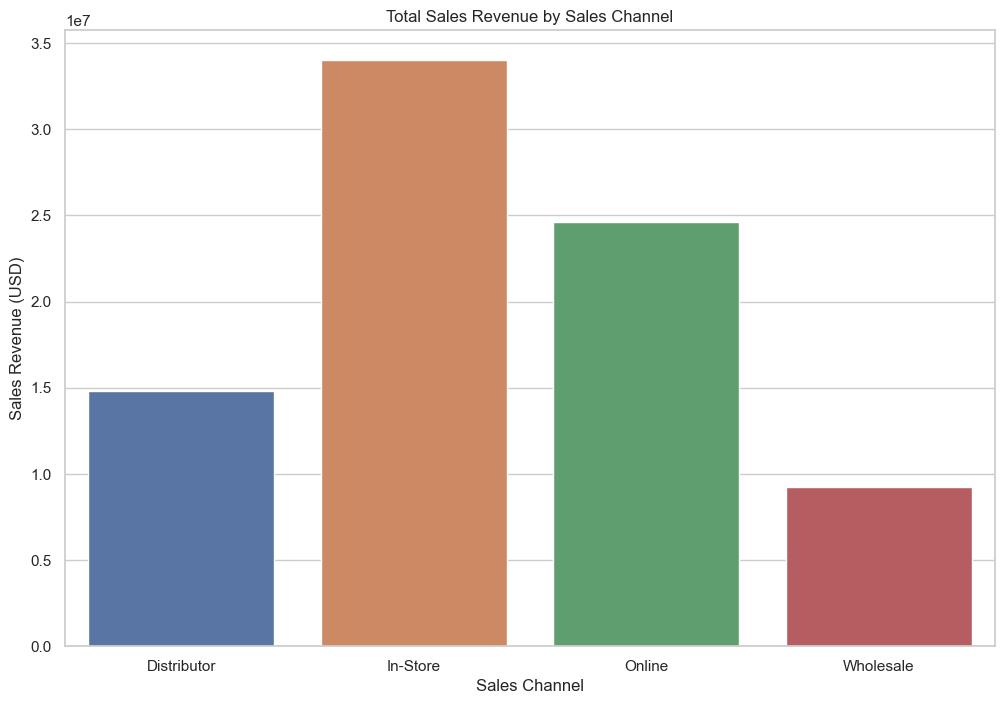

In [8]:
# Bar plot of total sales revenue by Sales Channel
plt.figure()
sns.barplot(data=channel_summary, x='Sales Channel', y='Sales Revenue')
plt.title('Total Sales Revenue by Sales Channel')
plt.ylabel('Sales Revenue (USD)')
plt.xlabel('Sales Channel')
plt.show()

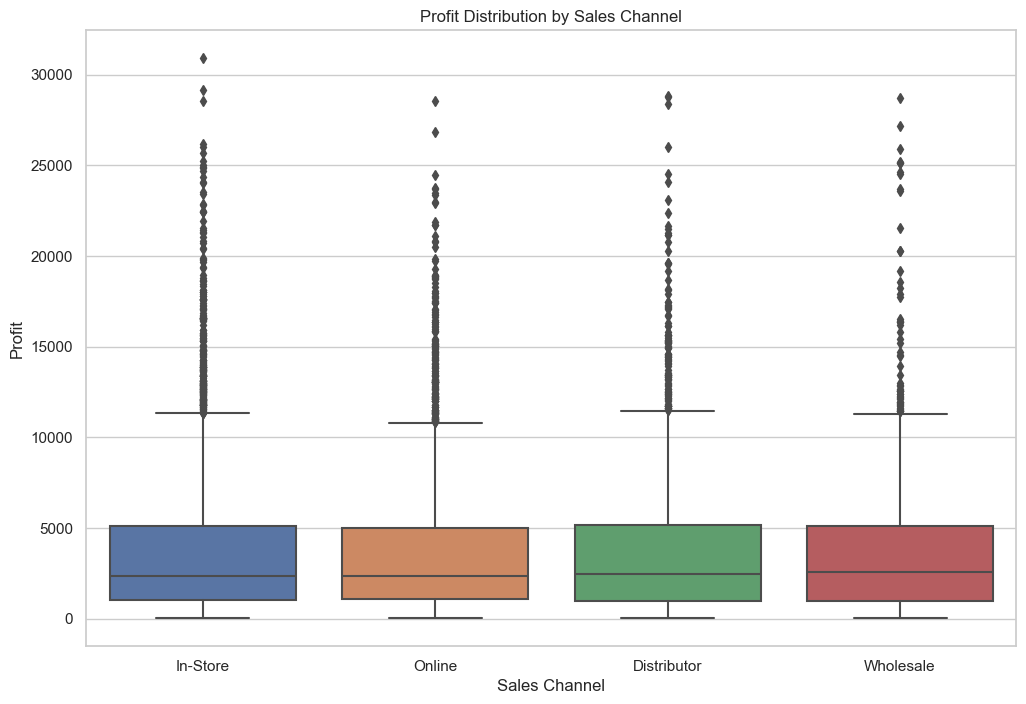

In [9]:
plt.figure()
sns.boxplot(data=df, x='Sales Channel', y='Profit')
plt.title('Profit Distribution by Sales Channel')
plt.show()

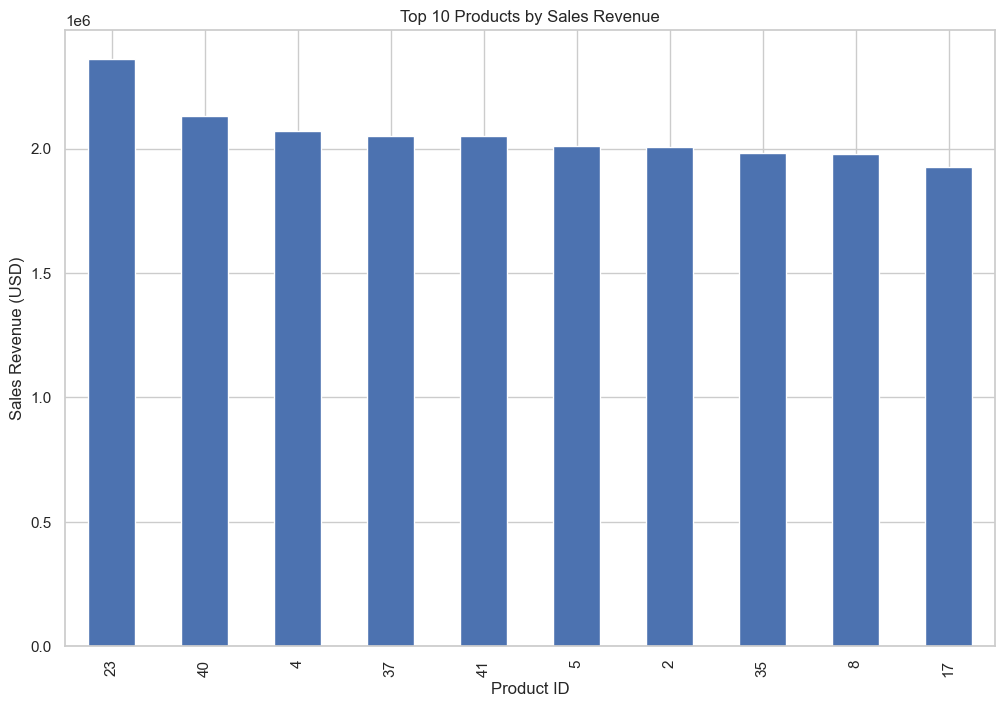

In [10]:
plt.figure()
top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales Revenue')
plt.ylabel('Sales Revenue (USD)')
plt.xlabel('Product ID')
plt.show()

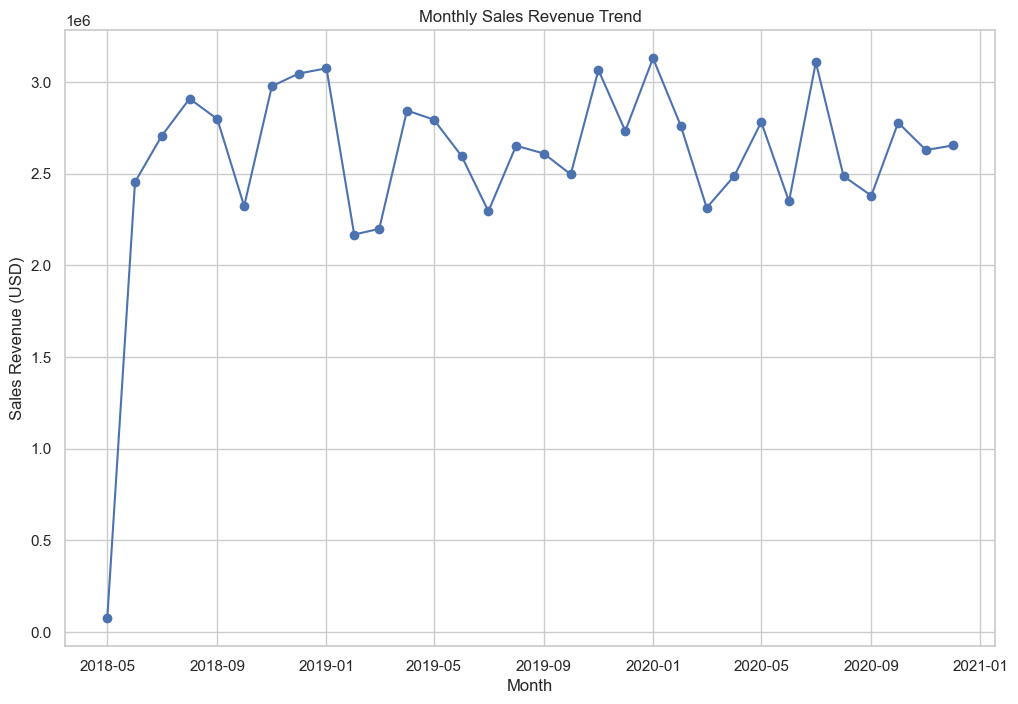

In [11]:
plt.figure()
plt.plot(monthly_sales['Order Month'], monthly_sales['Sales Revenue'], marker='o')
plt.title('Monthly Sales Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Sales Revenue (USD)')
plt.grid(True)
plt.show()

c:\Users\VAMSI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


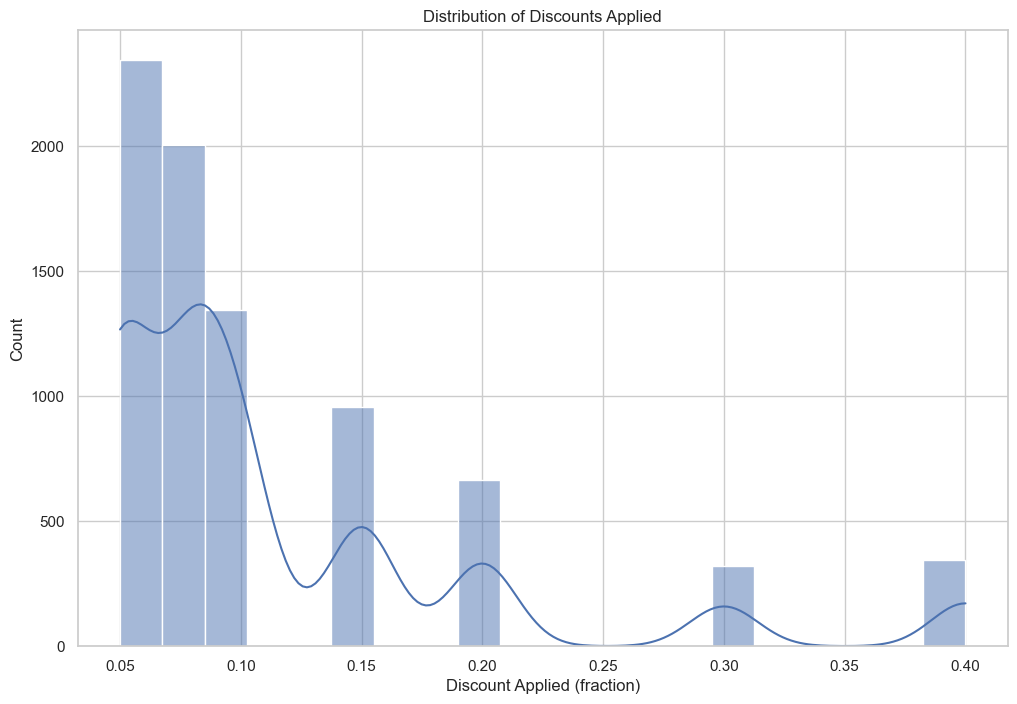

In [12]:
plt.figure()
sns.histplot(df['Discount Applied'], bins=20, kde=True)
plt.title('Distribution of Discounts Applied')
plt.xlabel('Discount Applied (fraction)')
plt.show()

c:\Users\VAMSI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


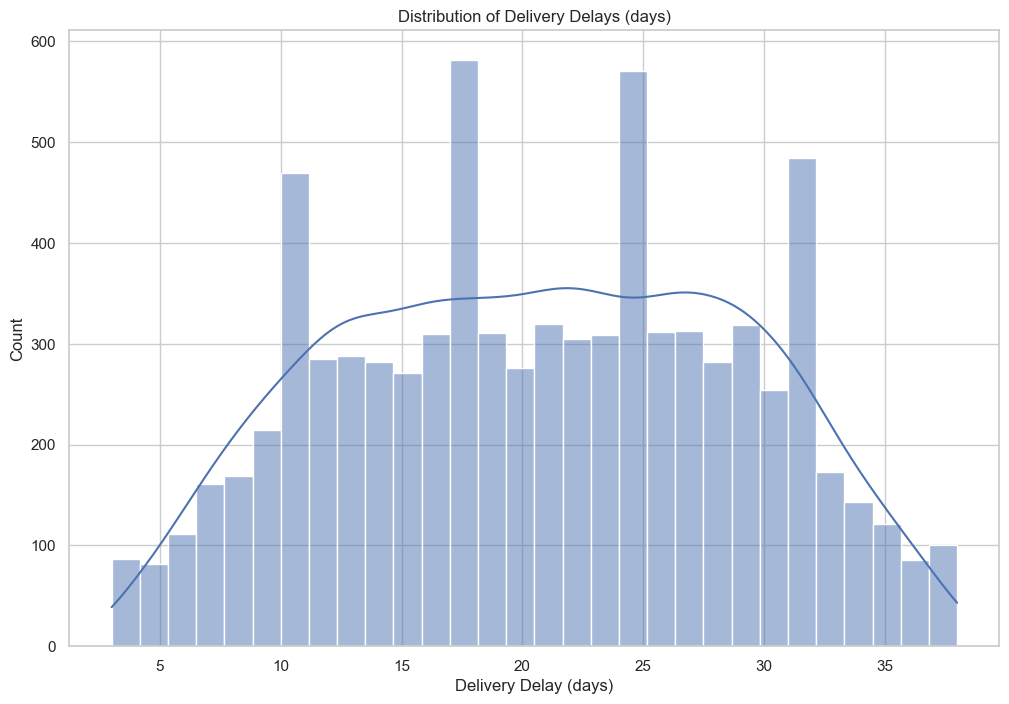

In [13]:
plt.figure()
sns.histplot(df['Delivery Delay'].dropna(), bins=30, kde=True)
plt.title('Distribution of Delivery Delays (days)')
plt.xlabel('Delivery Delay (days)')
plt.show()

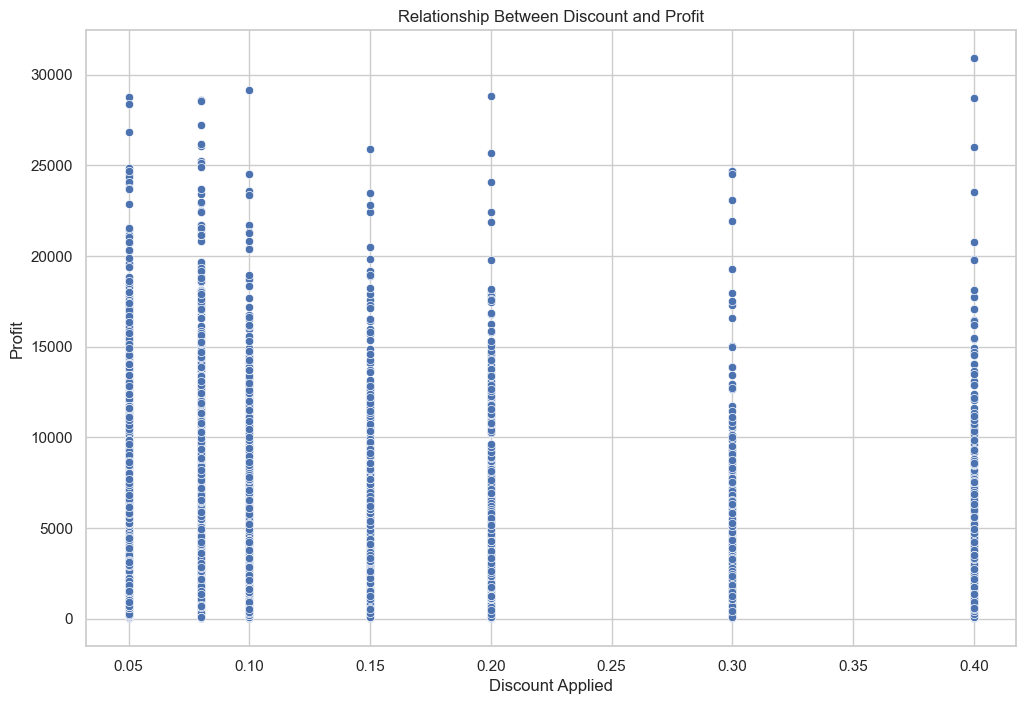

In [14]:
plt.figure()
sns.scatterplot(data=df, x='Discount Applied', y='Profit')
plt.title('Relationship Between Discount and Profit')
plt.xlabel('Discount Applied')
plt.ylabel('Profit')
plt.show()